In [31]:
import mne
import numpy as np
from matplotlib import pyplot as plt
import git
import os
import h5py
#%matplotlib qt

In [32]:
work_dir = git.Repo('.', search_parent_directories=True).working_tree_dir
control_data_dir = os.path.join(work_dir, "data/processed/test_control_group_301_328.hdf5")
raw_path = os.path.join(work_dir, "data", "raw_input")
montage_file = os.path.join(work_dir, "CACS-32_NO_REF_NO_CZ.bvef")
montage = mne.channels.read_custom_montage(montage_file)

In [33]:
subjects = list(range(301,329))
bad_channels, lof_scores, variances = [], [], []

In [34]:
for subject in subjects:
    with h5py.File(control_data_dir, 'r') as f:
        for trial in range(1,21):
            eeg_path = f'eeg/{str(subject)}/{str(trial)}'
            if trial == 1:
                subject_eeg_data = f[eeg_path][:31,:]
            else:
                subject_eeg_data = np.concatenate((subject_eeg_data, f[eeg_path][:31,:]), axis=1)
    #to get accurate info
    raw_filepath = os.path.join(raw_path, str(subject), str(subject)+".vhdr")
    raw_template = mne.io.read_raw_brainvision(raw_filepath, preload=True)
    raw_template.drop_channels(['Aux1', 'Aux2'])
    raw_template.set_montage(montage, match_case=False)
    info = raw_template.info

    raw = mne.io.RawArray(subject_eeg_data[:,:], info)
    raw.set_montage(montage, match_case=False)

    bad_channels_subj, scores_subj = mne.preprocessing.find_bad_channels_lof(raw, n_neighbors = 10, threshold=1.6, return_scores= True)


    bad_channels.append(bad_channels_subj)
    lof_scores.append(scores_subj)
    variances.append(np.var(subject_eeg_data, axis=1))

Extracting parameters from /data/do00noto/code/model_dev_aad_semeco/data/raw_input/301/301.vhdr...
Setting channel info structure...
Reading 0 ... 4393239  =      0.000 ...  4393.239 secs...


/tmp/ipykernel_208500/2936250083.py:11: RuntimeWarning: No coordinate information found for channels ['Aux1', 'Aux2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw_template = mne.io.read_raw_brainvision(raw_filepath, preload=True)
/tmp/ipykernel_208500/2936250083.py:11: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Aux1', 'Aux2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw_template = mne.io.read_raw_brainvision(raw_filepath, preload=True)
/tmp/ipykernel_208500/2936250083.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw_template.set_montage(montage, match_case=False)


Creating RawArray with float64 data, n_channels=31, n_times=341113
    Range : 0 ... 341112 =      0.000 ...   341.112 secs
Ready.
LOF: Detected bad channel(s): ['Fp1', 'F9', 'TP9', 'IO2', 'Fp2']


/tmp/ipykernel_208500/2936250083.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(montage, match_case=False)


Extracting parameters from /data/do00noto/code/model_dev_aad_semeco/data/raw_input/302/302.vhdr...
Setting channel info structure...
Reading 0 ... 4189379  =      0.000 ...  4189.379 secs...


/tmp/ipykernel_208500/2936250083.py:11: RuntimeWarning: No coordinate information found for channels ['Aux1', 'Aux2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw_template = mne.io.read_raw_brainvision(raw_filepath, preload=True)
/tmp/ipykernel_208500/2936250083.py:11: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Aux1', 'Aux2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw_template = mne.io.read_raw_brainvision(raw_filepath, preload=True)


Creating RawArray with float64 data, n_channels=31, n_times=341113
    Range : 0 ... 341112 =      0.000 ...   341.112 secs
Ready.
LOF: Detected bad channel(s): ['TP10', 'F10', 'IO2']


/tmp/ipykernel_208500/2936250083.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw_template.set_montage(montage, match_case=False)
/tmp/ipykernel_208500/2936250083.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(montage, match_case=False)


Extracting parameters from /data/do00noto/code/model_dev_aad_semeco/data/raw_input/303/303.vhdr...
Setting channel info structure...
Reading 0 ... 4095899  =      0.000 ...  4095.899 secs...


/tmp/ipykernel_208500/2936250083.py:11: RuntimeWarning: No coordinate information found for channels ['Aux1', 'Aux2']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw_template = mne.io.read_raw_brainvision(raw_filepath, preload=True)


In [5]:
lof_scores = np.array(lof_scores)
variances = np.array(variances)

/tmp/ipykernel_208500/2017453845.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots()


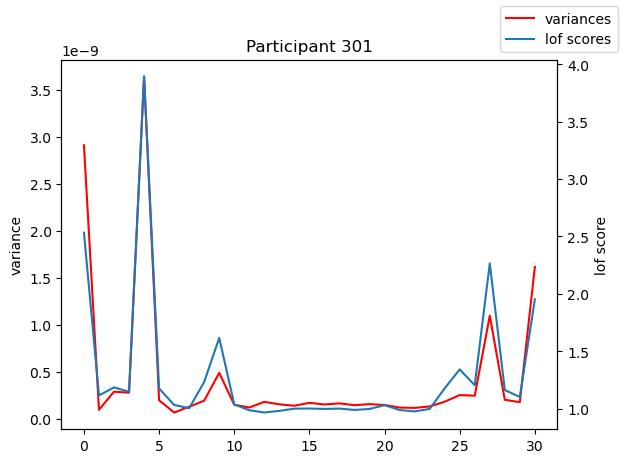

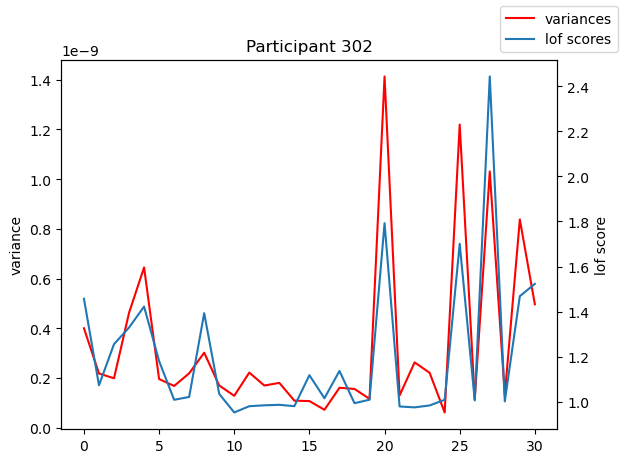

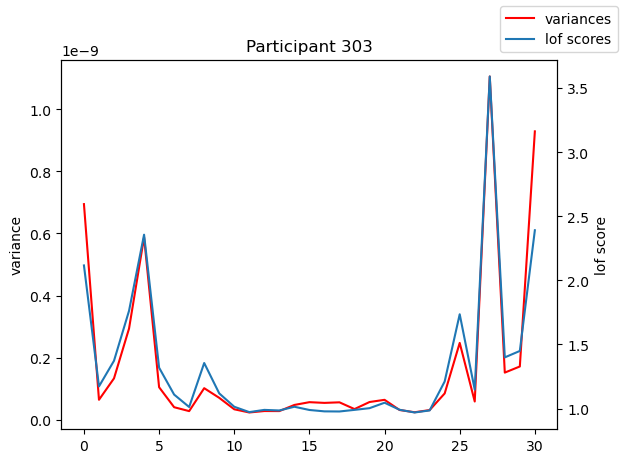

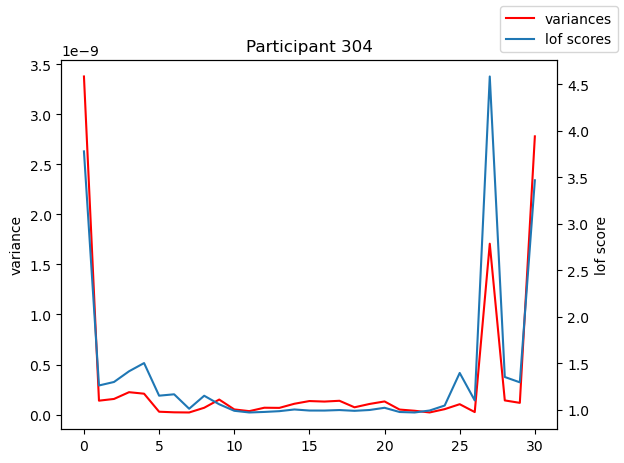

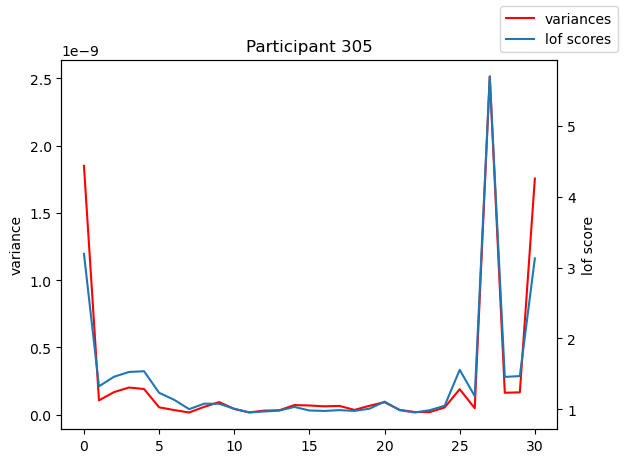

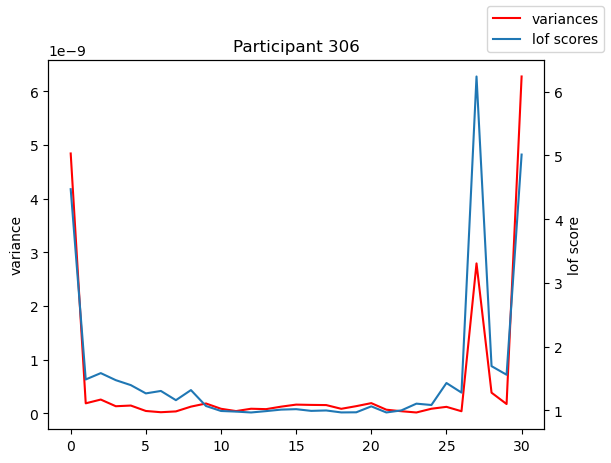

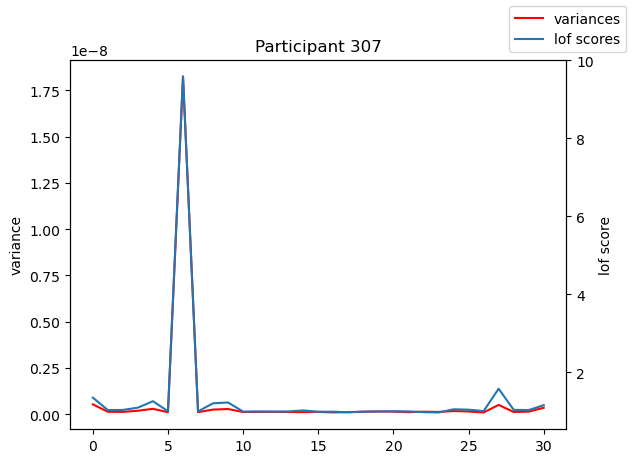

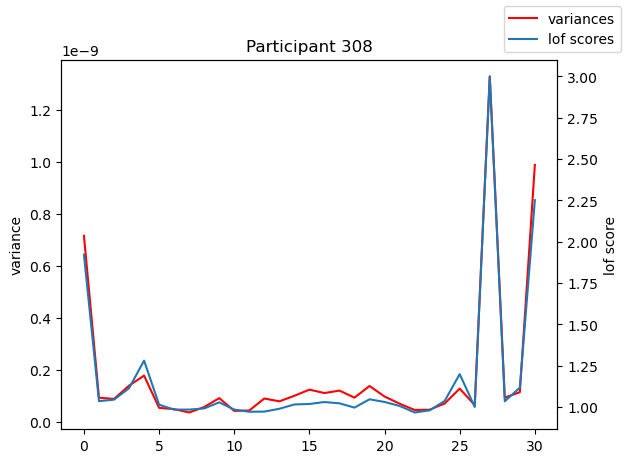

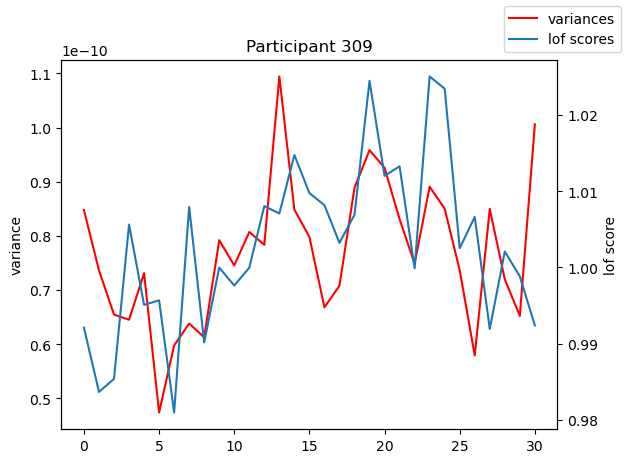

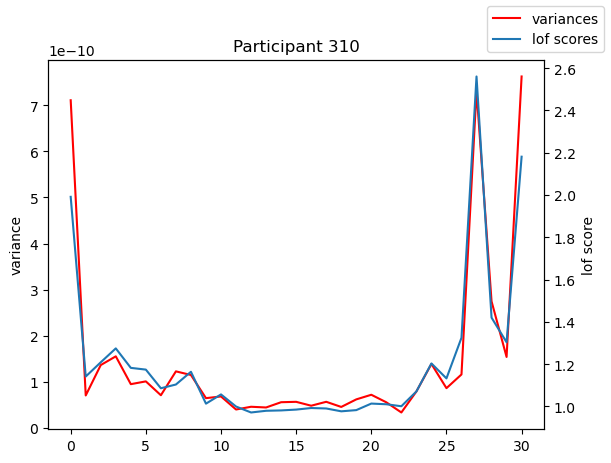

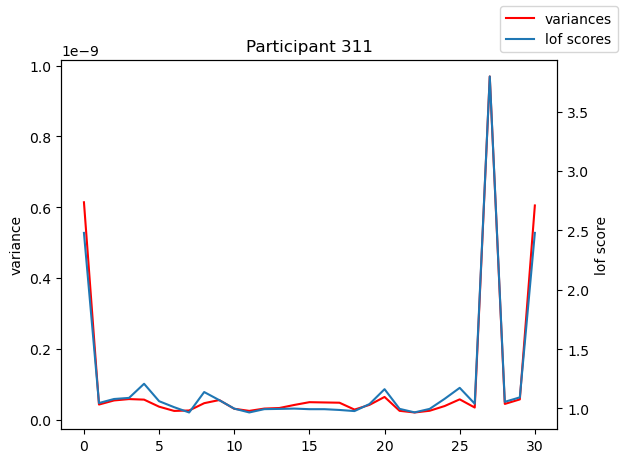

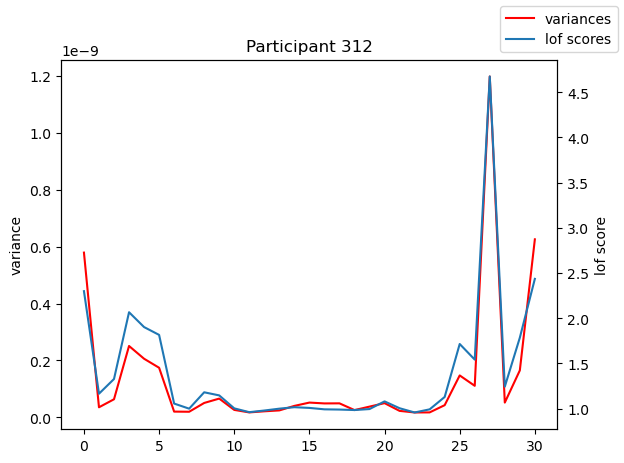

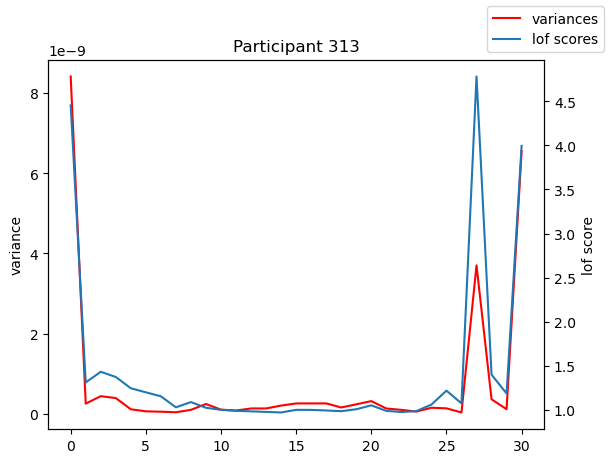

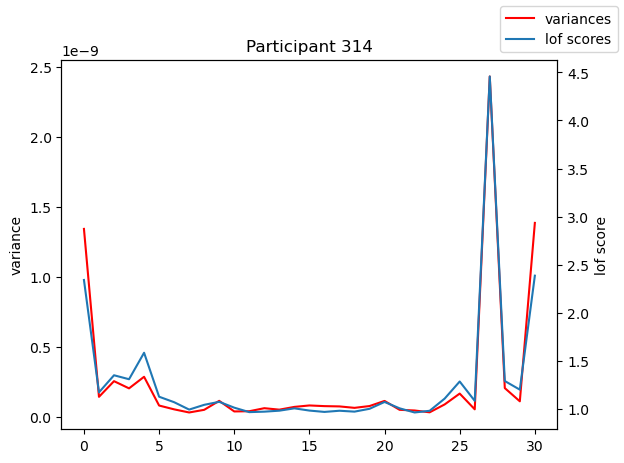

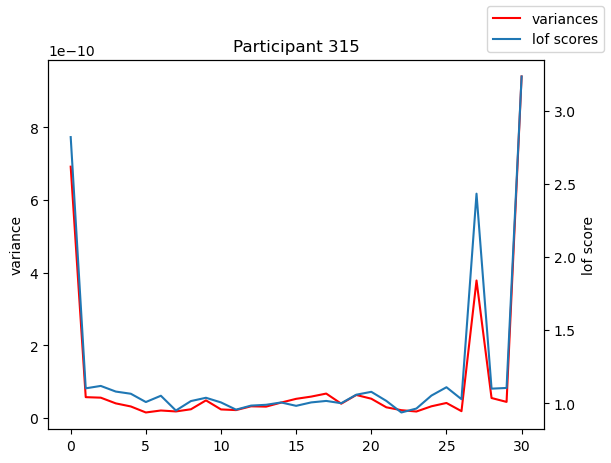

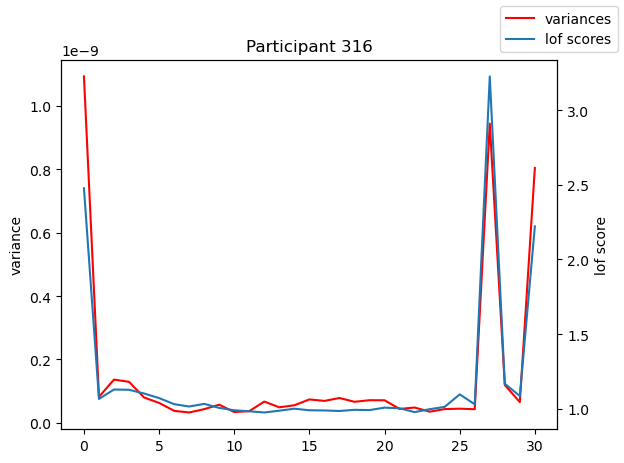

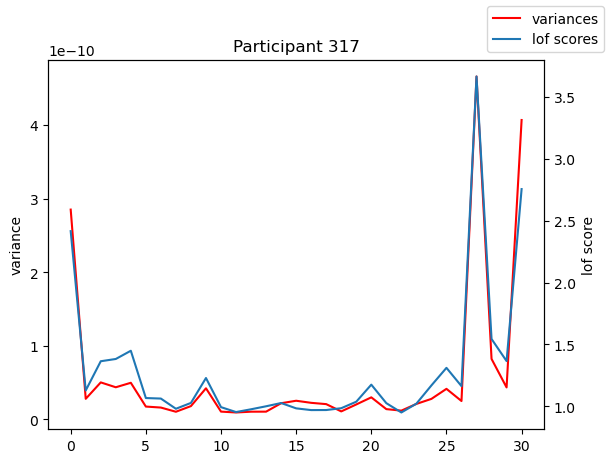

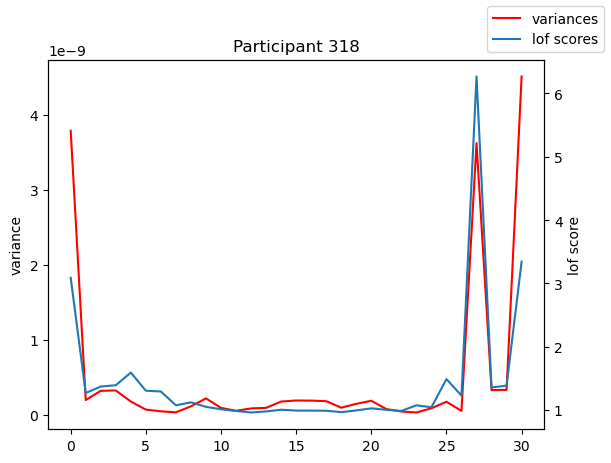

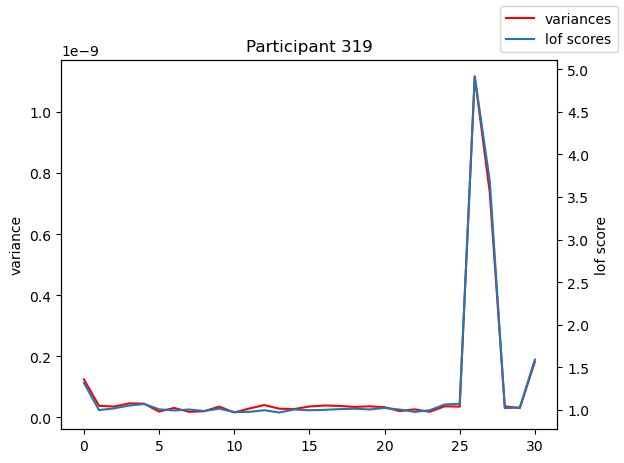

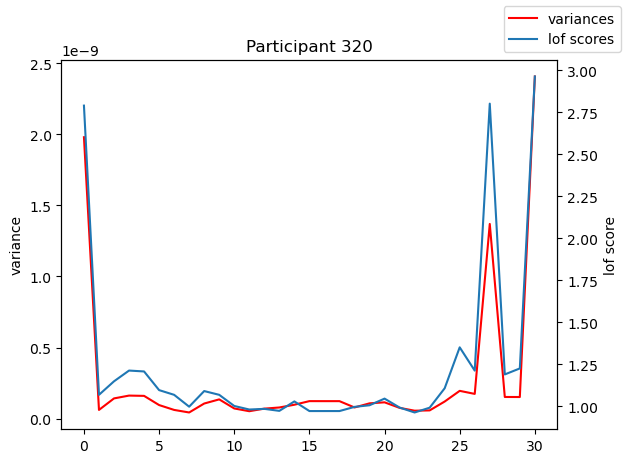

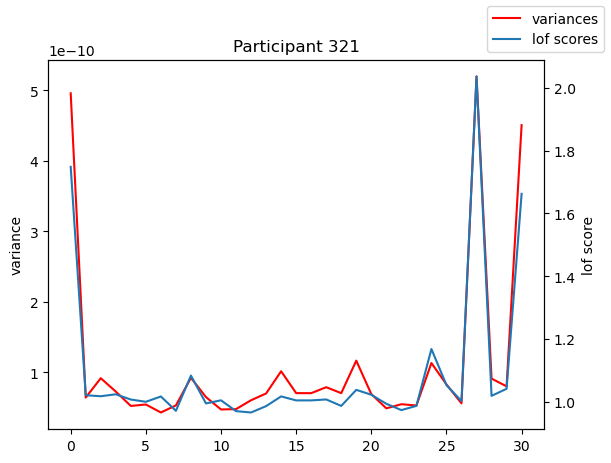

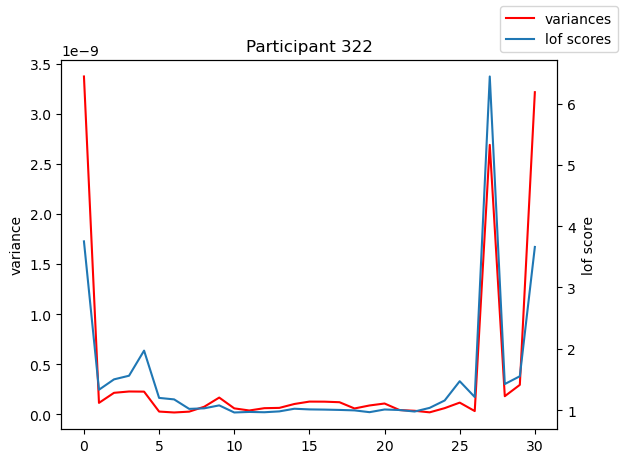

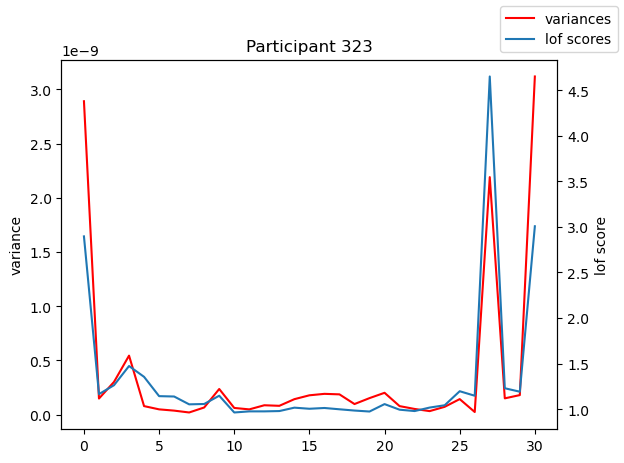

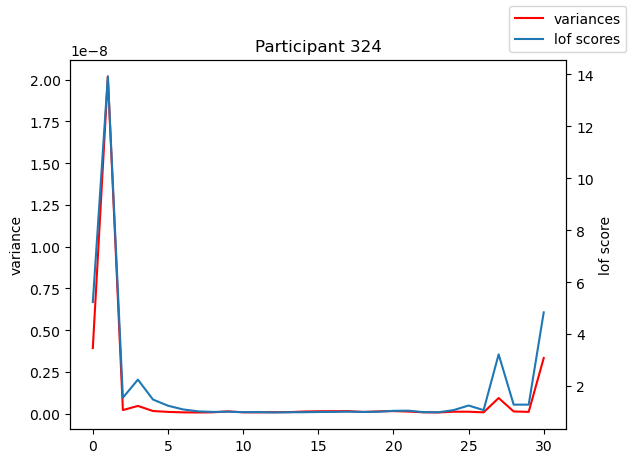

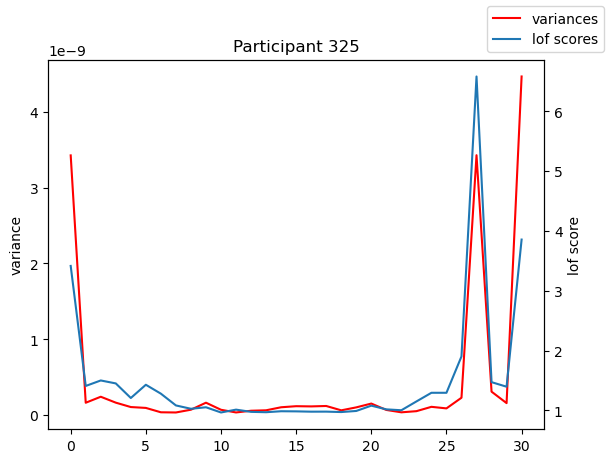

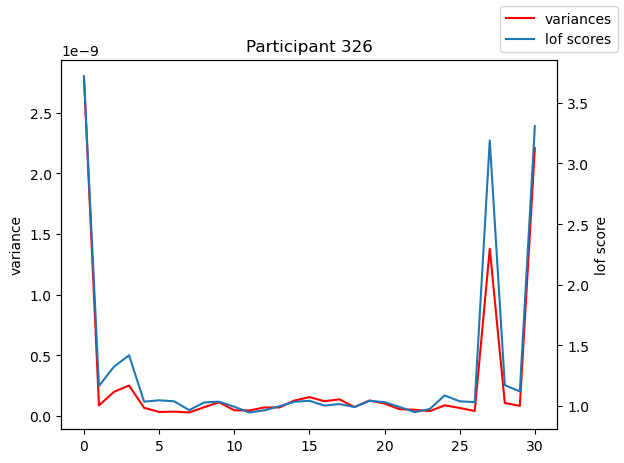

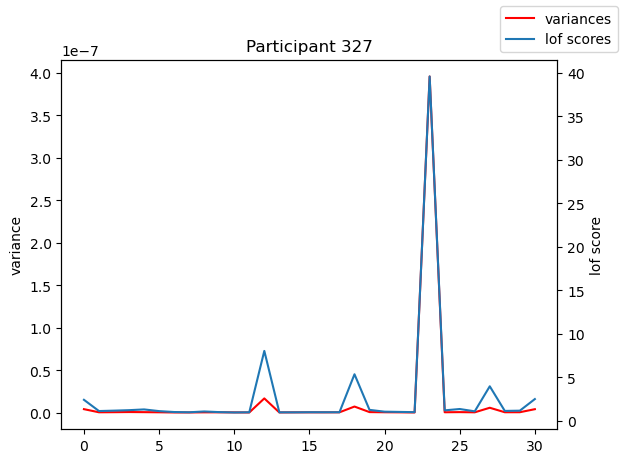

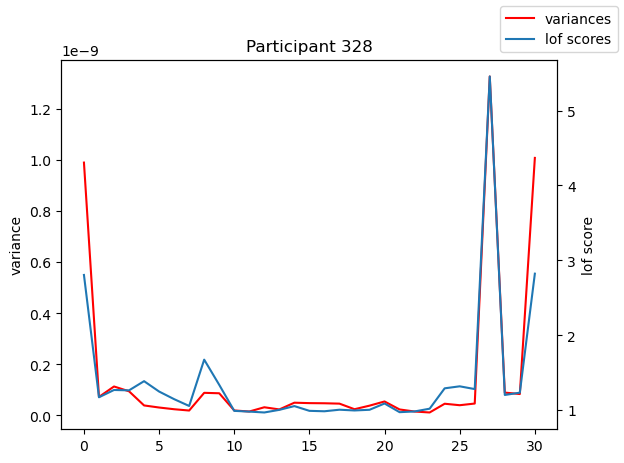

In [6]:
for i in range(0,28):
    fig, ax1 = plt.subplots()
    ax1.plot(variances[i,:], c='r', label = 'variances')
    ax1.set_ylabel('variance')
    ax2=ax1.twinx()
    ax2.plot(-lof_scores[i,:], label='lof scores')
    ax2.set_ylabel('lof score')
    fig.legend()
    part = 301 + i
    ax1.set_title(f'Participant {str(part)}')

Text(0, 0.5, 'count')

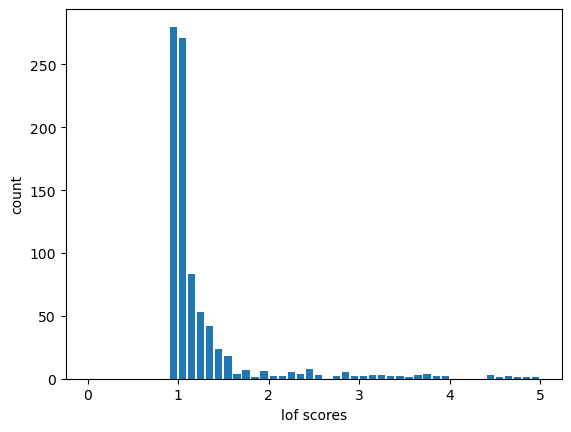

In [9]:
bins = np.linspace(0,5,51).tolist()
plt.hist(-lof_scores.flatten(), rwidth=0.8,bins = bins)
plt.xlabel('lof scores')
plt.ylabel('count')

In [15]:
bads = np.abs(lof_scores) > 1.6

In [17]:
bads.shape

(28, 31)

In [18]:
bads_per_subj = np.sum(bads, axis=1)

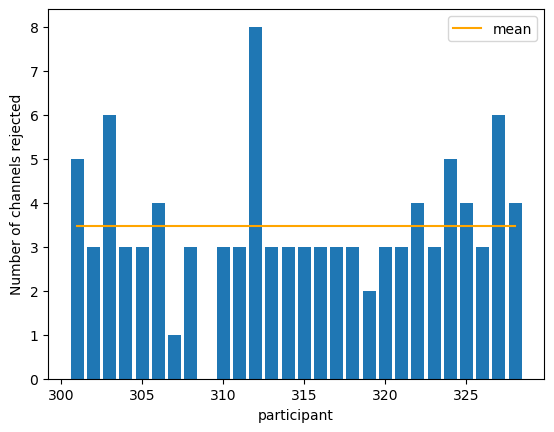

In [30]:
participants = list(range(301,329))
plt.bar(participants, bads_per_subj)
plt.plot(participants, np.repeat(np.mean(bads_per_subj), np.size(bads_per_subj)), label = 'mean', c='orange')
plt.xlabel('participant')
plt.ylabel('Number of channels rejected')
plt.legend()